<a href="https://colab.research.google.com/github/YoshB/YoshB/blob/main/PolinomicReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polinomic Regression

Load libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures as poly
from sklearn.linear_model import LinearRegression as lreg
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler as ss
from sklearn.pipeline import Pipeline as pipe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

Load data

In [4]:
#We need to load the data in csv format (for 2 dimensions regression, x,y)
data_1 = "df_regresion_nolineal_1.cvs"
data_2 = "df_regresion_nolineal_2.cvs"
data_3 = "df_regresion_nolineal_3.cvs"
data_4 = "df_regresion_nolineal_temp.cvs"

df1 = pd.read_csv(data_1)
df2 = pd.read_csv(data_2)
df3 = pd.read_csv(data_3)
df4 = pd.read_csv(data_4)

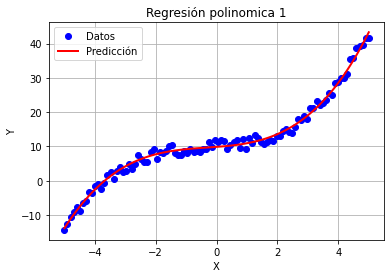

Train score:  0.9918320986897908
Test score:  0.988013269879073


In [5]:
# Load data in arrays x,y
x = np.asanyarray(df1[['x']])
y = np.asanyarray(df1[['y']])
#Split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Degree of the polinomic regresion
deg = 3

#Creat the pipe model
model_1 = pipe([('poly', poly(degree = deg)), ('scaler', ss()),('reg', lreg())])
#train and evaluate accuracy
model_1.fit(x_train,y_train)
yp = model_1.predict(x)

#Lets graph
plt.figure()
plt.title("Polinomic Regression 1"); plt.grid()
plt.xlabel("X"); plt.ylabel("Y")
plt.plot(x, y,'bo')
plt.plot(x, yp,'r-',lw=2)
plt.legend(["Data", "Prediction"])

plt.show()

#Print the accuracy with r2 score
print("Train score: ", model_1.score(x_train,y_train))
print("Test score: ", model_1.score(x_test,y_test))

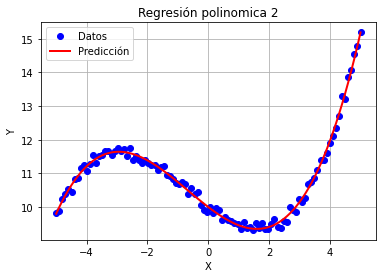

Train score:  0.9928393769265313
Test score:  0.99188095060058


In [6]:
# Load data in arrays x,y
x = np.asanyarray(df2[['x']])
y = np.asanyarray(df2[['y']])
#Split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Degree of the polinomic regresion
deg = 3
#Creat the pipe model
model_2 = pipe([('poly', poly(degree = deg)), ('scaler', ss()),('reg', lreg())])
#train and evaluate accuracy
model_2.fit(x,y)
yp = model_2.predict(x)

#Lets graph
plt.figure()
plt.title("Polinomic Regression 2"); plt.grid()
plt.xlabel("X"); plt.ylabel("Y")
plt.plot(x, y,'bo')
plt.plot(x, yp,'r-',lw=2)
plt.legend(["Data", "Prediction"])

plt.show()
print("Train score: ", model_2.score(x_train,y_train))
print("Test score: ", model_2.score(x_test,y_test))

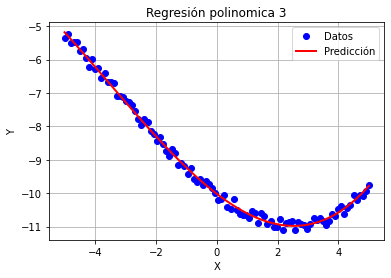

Train score:  0.9959082154355595
Test score:  0.9970361723416171


In [7]:
x = np.asanyarray(df3[['x']])
y = np.asanyarray(df3[['y']])
#Split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y)

# Degree of the polinomic regression
deg = 3

model_3 = pipe([('poly', poly(degree = deg)), ('scaler', ss()),('reg', lreg())])
model_3.fit(x,y)
yp = model_3.predict(x)


#Lets graph
plt.figure()
plt.title("Polinomic Regression 3"); plt.grid()
plt.xlabel("X"); plt.ylabel("Y")
plt.plot(x, y,'bo')
plt.plot(x, yp,'r-',lw=2)
plt.legend(["Data", "Prediction"])

plt.show()
print("Train score: ", model_3.score(x_train,y_train))
print("Test score: ", model_3.score(x_test,y_test))

NON regularized model
Train score:  0.9951122331364498
Test score:  0.9950419683137269
Regulirized model
Train score:  0.9943497297300339
Test score:  0.9942242539518581


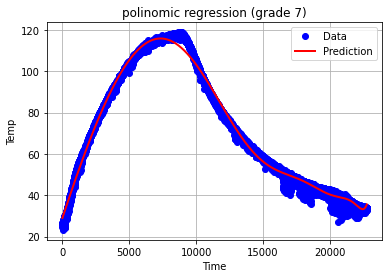

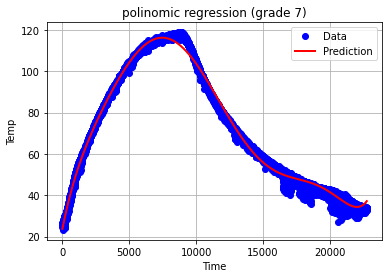

In [8]:
x = np.asanyarray(df4[['time']])
y = np.asanyarray(df4[['temp']])
#Split the data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x,y)

# NON regulirized model
# Degree of the polinomic regresion
deg = 7

model_4_noregul = pipe([('poly', poly(degree = deg)), ('scaler', ss()),('reg', lreg())])

model_4_noregul.fit(x_train,y_train)
print("NON regularized model")
print("Train score: ", model_4_noregul.score(x_train,y_train))
print("Test score: ", model_4_noregul.score(x_test,y_test))
yp = model_4_noregul.predict(x)

#Regularized Model
deg = 30
model_4_regul = pipe([('poly', poly(degree = deg)), ('scaler', ss()),('reg', Ridge(0.01))])
model_4_regul.fit(x_train,y_train)
print("Regulirized model")
print("Train score: ", model_4_regul.score(x_train,y_train))
print("Test score: ", model_4_regul.score(x_test,y_test))
yp2 = model_4_regul.predict(x)

#Graph regulirized model
plt.figure()
plt.title("polinomic regression (grade 7)"); plt.grid()
plt.xlabel("Time"); plt.ylabel("Temp")
plt.plot(x, y,'bo')
plt.plot(x, yp2,'r-',lw=2)
plt.legend(["Data", "Prediction"])

plt.show()

#Graph NON regulirized model
plt.figure()
plt.title("polinomic regression (grade 7)"); plt.grid()
plt.xlabel("Time"); plt.ylabel("Temp")
plt.plot(x, y,'bo')
plt.plot(x, yp,'r-',lw=2)
plt.legend(["Data", "Prediction"])

plt.show()